In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# read from .csv file
ds_salary_df = pd.read_csv('ds_salaries.csv')
ds_salary_df.head()
# all salaries are yearly (annual)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [53]:
# delete unnamed column
ds_salary_df_1 = ds_salary_df.drop(columns=['Unnamed: 0'])
ds_salary_df_1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [54]:
# check missing values
ds_salary_df_1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [55]:
# average salary by work year
year_salary = ds_salary_df_1.groupby('work_year')['salary_in_usd'].mean()
year_salary

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

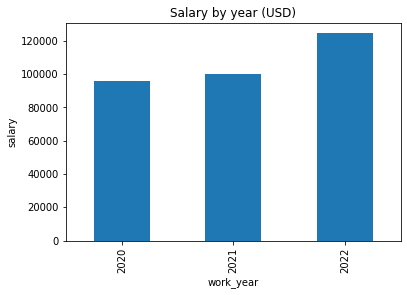

In [56]:
year_salary.plot(kind='bar')
plt.title('Salary by year (USD)')
plt.ylabel('salary')
plt.show()

There is only a slight increase in average salary between 2020 and 2021, but a significant increase in that between 2021 and 2022.

In [57]:
# average salary by experience level
xp_salary = ds_salary_df_1.groupby('experience_level')['salary_in_usd'].mean()
xp_salary.sort_values(ascending=False)

experience_level
EX    199392.038462
SE    138617.292857
MI     87996.056338
EN     61643.318182
Name: salary_in_usd, dtype: float64

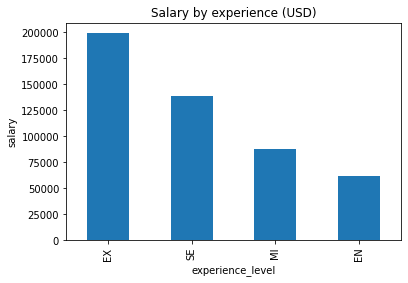

In [58]:
xp_salary.sort_values(ascending=False).plot(kind='bar')
plt.title('Salary by experience (USD)')
plt.ylabel('salary')
plt.show()

Entry level jobs in developed countries typically earn around 60000 dollars per year, which translate to around 5000 dollars per month or 75 million rupiahs per month.
Executive jobs earn almost 200000 dollars per year, which means around 16000 dollars per year or 240 million rupiahs per month.

In [59]:
# average salary by company size
size_salary = ds_salary_df_1.groupby('company_size')['salary_in_usd'].mean()
size_salary

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64

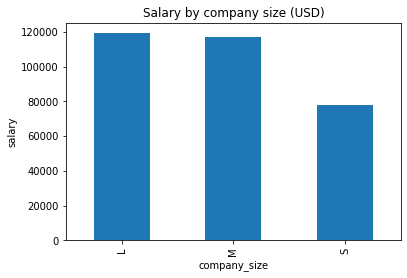

In [60]:
size_salary.plot(kind='bar')
plt.title('Salary by company size (USD)')
plt.ylabel('salary')
plt.show()

As hypothesized, the larger then company, the salary will tend to be higher. However, there is no significant difference in salary between medium sized and large sized companies.

In [61]:
# average salary by employment type
size_salary = ds_salary_df_1.groupby('employment_type')['salary_in_usd'].mean()
size_salary.sort_values(ascending=False)

employment_type
CT    184575.000000
FT    113468.073129
FL     48000.000000
PT     33070.500000
Name: salary_in_usd, dtype: float64

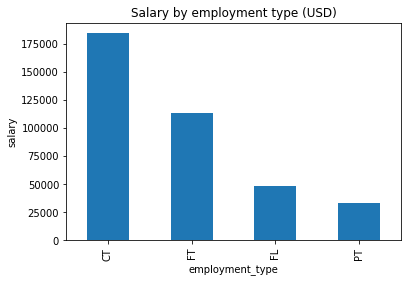

In [62]:
size_salary.sort_values(ascending=False).plot(kind='bar')
plt.title('Salary by employment type (USD)')
plt.ylabel('salary')
plt.show()

Contract and full-time employees receive statistically significant higher than part-time or flexible time employees. This is expected, since contract and full-time employees usually perform better than part-time or flexible time employees.

In [63]:
# average salary by company's country
country_salary = ds_salary_df_1.groupby('company_location')['salary_in_usd'].mean()
country_salary.sort_values(ascending=False)

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
SG     89294.000000
BE     85699.000000
DE     81887.214286
GB     81583.042553
AT     72920.750000
CN     71665.500000
IE     71444.000000
PL     66082.500000
CH     64114.000000
FR     63970.666667
SI     63831.000000
RO     60000.000000
NL     54945.750000
DK     54386.333333
ES     53060.142857
GR     52293.090909
CZ     50937.000000
PT     47793.750000
HR     45618.000000
LU     43942.666667
CL     40038.000000
MY     40000.000000
IT     36366.500000
HU     35735.000000
EE     32974.000000
MX     32123.333333
NG     30000.000000
IN     28581.750000
MT     28369.000000
CO     21844.000000
TR     20096.666667
HN     20000.000000
BR     18602.666667
AS     18053.000000
MD     18000.000000
UA     13400.000000
PK     13333.333333
KE      9272.000000
IR      4000.000000
VN 

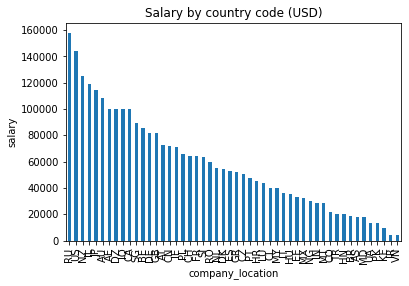

In [64]:
country_salary.sort_values(ascending=False).plot(kind='bar')
plt.title('Salary by country code (USD)')
plt.ylabel('salary')
plt.show()

The more developed a country is, the higher the average salary will be, because the main criteria for determining developed countries is by GDP per capita and the economy.

In [65]:
# average salary by ratio of WFA/WFO
wfa_salary = ds_salary_df_1.groupby('remote_ratio')['salary_in_usd'].mean()
wfa_salary

remote_ratio
0      106354.622047
50      80823.030303
100    122457.454068
Name: salary_in_usd, dtype: float64

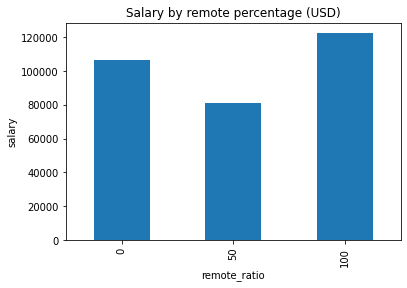

In [66]:
# 0 is full WFO, 50 is hybrid, 100 is full WFA
wfa_salary.plot(kind='bar')
plt.title('Salary by remote percentage (USD)')
plt.ylabel('salary')
plt.show()

In general, hybrid workers typically earn lower salary than full WFA or full WFA. Full WFA workers typically earn higher than even WFO. This is probably due to full WFA workers rank are typically have high experience level, as indicated below.

In [67]:
ds_salary_df_1.groupby(['experience_level', 'remote_ratio']).size()

experience_level  remote_ratio
EN                0                14
                  50               25
                  100              49
EX                0                 3
                  50                5
                  100              18
MI                0                56
                  50               42
                  100             115
SE                0                54
                  50               27
                  100             199
dtype: int64

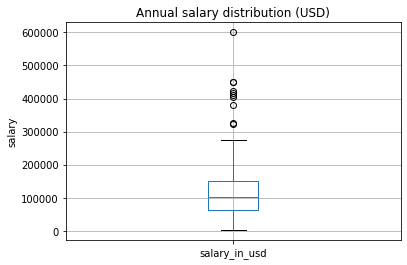

In [68]:
# overall salary boxplot
ds_salary_df_1.boxplot(column=['salary_in_usd'])
plt.title('Annual salary distribution (USD)')
plt.ylabel('salary')
plt.show()

There seems to be some upper outliers in this data, however this is actually normal, because there will be extremely rare cases of an employee earn very high salary.